In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#align or mtcnn
!pip install mtcnn

In [11]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import matplotlib.image as img
import mtcnn
import matplotlib
import sys
sys.path.insert(0,'/content/drive/My Drive')
import model_1
from model_1 import create_model
from align import AlignDlib
%matplotlib inline

In [50]:
class LoadDataset():
  
  def __init__(self):
    
    self.train_path = "/content/drive/MyDrive/CelebDataSet/data/train/"
    self.test_path   = "/content/drive/MyDrive/celebDataSet/data/val/"
    self.yarr , self.Y , self.xdict = [] , [] , dict()

    for i in os.listdir(self.train_path):
      self.yarr.append(i) 
    for i in self.yarr:
      self.xdict[i]=[]

    for i in os.listdir(self.train_path):
      for j in os.listdir(self.train_path+i):
        testImage = img.imread(self.train_path + i+ "/" + j )
        self.xdict[i].append(testImage)

    for i in self.xdict.keys():
      for j in range(len(self.xdict[i])):
        self.Y.append(i)
    print(self.xdict.keys())

  def ReturnDataset(self):
    
    return self.xdict , self.yarr , self.Y

  def Imshow(self,name,number):
    
    plt.imshow(self.xdict[name][number])
    plt.show()
  
  def MTCNN(self , name , number):
      
    detector = mtcnn.MTCNN()
    faces = detector.detect_faces(self.xdict[name][number])
    plt.imshow(self.xdict[name][number])
      
    def draw_facebox(result_list):  
      
      ax = plt.gca()
      STANDARD_SHAPE = 96
        
      for result in faces:
        x, y, width, height = result['box']
        print(f"-----before croping--{width , height}------")
        rect = plt.Rectangle((x, y), width, height, fill=False, color='green')
        ax.add_patch(rect)
        plt.show()
        
        print("-----after croping----150 X 150----")
        im = Image.fromarray(self.xdict[name][number])
        im = im.crop((x , y , x+STANDARD_SHAPE , y+STANDARD_SHAPE))
        plt.imshow(im)

      return np.array(im)
    im = draw_facebox(faces)
    return im

  #alignment = AlignDlib('models/landmarks.dat')

  def show_original_and_aligned(self,img_index):
    
    plt.figure(figsize=(10,10))
    bb = alignment.getLargestFaceBoundingBox(original)
    aligned = alignment.align(96, original, bb, landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)
    plt.subplot(131)
    plt.imshow(original)
    plt.subplot(132)
    plt.imshow(original)
    plt.gca().add_patch(patches.Rectangle((bb.left(), bb.top()), bb.width(), bb.height(), fill=False, color='red'))
    plt.subplot(133)
    plt.imshow(aligned)

In [51]:
ld = LoadDataset()
xdict , yarr , Y = ld.ReturnDataset()

dict_keys(['mindy_kaling', 'will_smith', 'lauren_cohan', 'sofia_vergara', 'simon_pegg', 'madonna', 'elton_john', 'anne_hathaway', 'dwayne_johnson', 'arnold_schwarzenegger', 'kate_beckinsale', 'jerry_seinfeld', 'ben_afflek', 'keanu_reeves'])


In [57]:
#custom made or inception net
class faceNet():
      
    def __init__(self):    
      self.nn = create_model()  
  
    def returnModel(self):
      return self.nn
    
    def batch_hard_triplet_loss(self , labels , embeddings , margin , squared=False):
      
      pairwise_dist = _pairwise_distances(embeddings, squared=squared)
      mask_anchor_positive = _get_anchor_positive_triplet_mask(labels)
      mask_anchor_positive = tf.to_float(mask_anchor_positive)
      anchor_positive_dist = tf.multiply(mask_anchor_positive, pairwise_dist)
      hardest_positive_dist = tf.reduce_max(anchor_positive_dist, axis=1, keepdims=True)
      mask_anchor_negative = _get_anchor_negative_triplet_mask(labels)
      mask_anchor_negative = tf.to_float(mask_anchor_negative)
      max_anchor_negative_dist = tf.reduce_max(pairwise_dist, axis=1, keepdims=True)
      anchor_negative_dist = pairwise_dist + max_anchor_negative_dist * (1.0 - mask_anchor_negative)
      hardest_negative_dist = tf.reduce_min(anchor_negative_dist, axis=1, keepdims=True)
      triplet_loss = tf.maximum(hardest_positive_dist - hardest_negative_dist + margin, 0.0)
      triplet_loss = tf.reduce_mean(triplet_loss)  
      
      return triplet_loss
      
    def modelTrain(self):
        
      self.nn.compile(loss=self.batch_hard_triplet_loss(labels, embeddings, margin, squared=False),optimizer = keras.optimizers.adadelta())
      history = self.nn.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

      
    def model_Train_Test_Save(self):
      print("model saved")
      self.nn.save("/content/drive/My Drive/FACENET_MODEL")

-----before croping--(52, 75)------


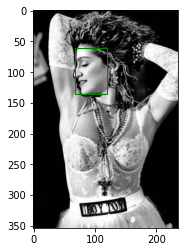

-----after croping----150 X 150----
GENERATED EMBEDDING IS
[ 0.0694954   0.00584066 -0.0682169   0.06716733 -0.06844629 -0.16716705
 -0.0710298  -0.02174819 -0.02324472  0.01957102 -0.00251728  0.010546
  0.09028778  0.02781322 -0.11173693 -0.02782425  0.05909279 -0.05662281
 -0.21061112 -0.00517956 -0.0668608  -0.02427714 -0.16432092  0.03168011
  0.13575496  0.06873103 -0.02945122 -0.03327252  0.09098587  0.06903536
  0.02269438 -0.1119768   0.06583894  0.10601162 -0.07498015  0.1644989
  0.11418942 -0.06987683  0.11855426  0.15501806  0.01959387 -0.04011399
  0.14578058  0.09826197  0.12464819 -0.06677756 -0.01734707 -0.05716397
 -0.03506479 -0.05858819 -0.05829186  0.19113988 -0.14904635  0.00564042
  0.08143819 -0.05076804  0.04004155  0.02856052 -0.15789232  0.1433502
  0.1282394   0.09536359  0.10193423 -0.02187777 -0.00314408  0.1330744
  0.16230048 -0.00776347  0.10756218  0.20387113  0.09210398  0.00349801
  0.01607211 -0.07517831  0.00704924 -0.00797364  0.11579963  0.109434

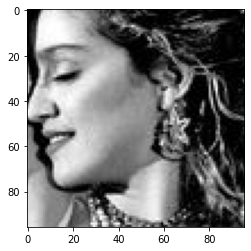

In [60]:
_FACENET = faceNet()
nn = _FACENET.returnModel()
xdict , yarr , Y = ld.ReturnDataset()
im = ld.MTCNN("madonna",1)
print("GENERATED EMBEDDING IS")
print(nn.predict(np.expand_dims(im, axis=0))[0])
_FACENET.model_Train_Test_Save()

In [61]:
model = tf.keras.models.load_model("/content/drive/My Drive/FACENET_MODEL")
model.summary()

Model: "model_76"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_78 (InputLayer)          [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 zero_padding2d_513 (ZeroPaddin  (None, 102, 102, 3)  0          ['input_78[0][0]']               
 g2D)                                                                                             
                                                                                                  
 conv1 (Conv2D)                 (None, 48, 48, 64)   9472        ['zero_padding2d_513[0][0]']     
                                                                                                  
 bn1 (BatchNormalization)       (None, 48, 48, 64)   256         ['conv1[0][0]']           